# Machine Learning Assignment # 02 | Faizan Ikram - 2018-UET-NML-27

# 1 - Linear Network

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

print('\nData: ', train_df.head())


Data:            x         y  color
0  4.925797  5.720423    0.0
1  1.362106  2.273853    0.0
2  3.404965  4.229191    0.0
3  2.420137  1.224555    1.0
4  4.313450  3.361849    1.0


# Plotting Data

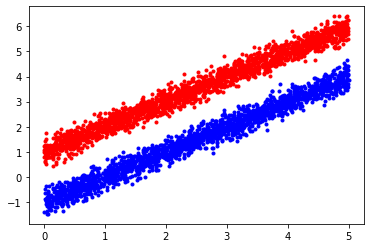

In [3]:
df1 = train_df[train_df.color==0]
df2 = train_df[train_df.color==1]

plt.scatter(df1.x, df1.y, marker = '.', color='red')
plt.scatter(df2.x, df2.y, marker = '.', color='blue')
plt.show()

# Sequencial API

In [4]:
# #Sequencial API (Seq: We can map One Input to One Output - Not Flexible)
#model = keras.Sequential([
#keras.layers.Dense(4, input_shape=(2,), activation='relu'), 
#keras.layers.Dense(2, activation='sigmoid')])

# Functional API

In [5]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(4, activation='relu', name='First_layer')(inputs)
outputs = keras.layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 4)                 12        
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [6]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

y = train_df.color.values
X = np.column_stack((train_df.x.values, train_df.y.values))
epochs = 5

In [7]:
clf = model.fit(X, y, batch_size=4,  epochs=epochs, verbose=2)

Epoch 1/5
1000/1000 - 1s - loss: 0.5324 - accuracy: 0.8000
Epoch 2/5
1000/1000 - 1s - loss: 0.1313 - accuracy: 0.9977
Epoch 3/5
1000/1000 - 2s - loss: 0.0236 - accuracy: 0.9990
Epoch 4/5
1000/1000 - 2s - loss: 0.0085 - accuracy: 1.0000
Epoch 5/5
1000/1000 - 2s - loss: 0.0042 - accuracy: 1.0000


# Test Data Evaluation

In [8]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))
test_y = test_df.color.values
print("EVALUATION")
model.evaluate(test_x, test_y)

EVALUATION
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000


[0.003118235385045409, 1.0]

# Test Data Scatter Plot

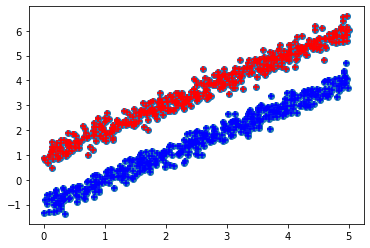

In [9]:
plt.scatter(test_df.x,test_df.y)

df1 = test_df[test_df.color==0]
df2 = test_df[test_df.color==1]

plt.scatter(df1.x, df1.y, marker = '+', color='red')
plt.scatter(df2.x, df2.y, marker = '+', color='blue')

plt.show()

# Plotting Hyperplane ( Training Data )

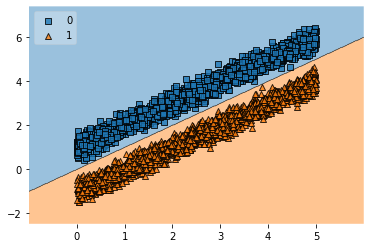

In [12]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary
a = plot_decision_regions(X, y.astype(np.int_), clf=svm, legend=2)
handles, labels = a.get_legend_handles_labels()

plt.show()

# Plotting Hyperplane ( Test Data )

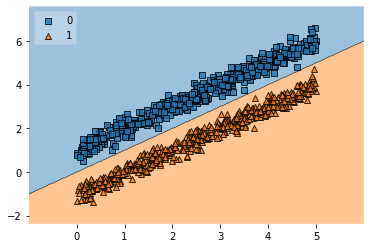

In [13]:
# Plot decision boundary
a = plot_decision_regions(test_x, test_y.astype(np.int_), clf=svm, legend=2)
handles, labels = a.get_legend_handles_labels()

plt.show()